In [1]:
# IMPORTING LIBRARY

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
data = pd.read_csv("student-mat.csv", sep = ";")
# print(data.head())

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data = shuffle(data)  #Optional - Shuffle Data
# print(data.head())

predict = "G3"

In [3]:
X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size = 0.9)

In [9]:
# TRAINING MODEL MULTIPLE TIMES FOR BEST SCORES

best = 0
iterations = 30
for _ in range(iterations):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size = 0.9)
    # print(X_train.shape)  print(y_train.shape)  print(X_test.shape)  print(y_test.shape)
    
    linear = linear_model.LinearRegression()
    
    linear.fit(X_train, y_train)
    acc = linear.score(X_test, y_test)
    # print("Accuracy: ", acc)
    
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
            
print(best)

0.9435401170509543


In [5]:
# LOAD MODEL

pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [6]:
print("------------------")
print("Coeficient: \n", linear.coef_)
print("Intercept: \n", linear.intercept_)
print("------------------")

------------------
Coeficient: 
 [ 0.16075701  0.97499594 -0.17186375 -0.25025139  0.03856503]
Intercept: 
 -1.5662301893472943
------------------


In [7]:
predictions = linear.predict(X_test)

for i in range(len(predictions)):
    print(predictions[i], X_test[i], y_test[i])

11.92825444589723 [14 12  4  0  6] 13
5.450967340962484 [ 7  6  2  0 10] 6
6.989322693386985 [9 8 1 3 6] 10
8.06156748402137 [9 9 2 1 0] 0
14.632958804901339 [13 15  3  0  0] 15
7.989047262296067 [7 9 1 1 2] 8
10.464490575263799 [10 11  4  0 10] 11
14.672389858191906 [15 14  2  1 20] 13
14.22847070206623 [15 14  2  0  2] 14
17.065221719827555 [16 17  3  0  0] 17
15.253138400478896 [14 15  1  0  3] 16
6.674305557968841 [8 8 1 3 2] 10
10.261810748085415 [ 9 11  2  0  0] 12
8.228191921691897 [8 9 2 0 2] 8
8.965300783681096 [ 7 10  2  0  0] 11
12.811892361815609 [14 12  2  0 20] 13
15.768711755423237 [14 16  3  0  0] 16
12.85483067689405 [13 13  2  0  0] 13
4.975193191661923 [5 6 2 0 6] 6
3.6793126958161935 [6 5 2 1 0] 0
5.430005934314503 [7 6 1 0 5] 7
8.448451963120531 [ 7 10  4  1  2] 10
10.41146103057858 [11 11  3  0  0] 10
9.103844334785007 [10 10  4  0  0] 10
19.18270405368368 [17 18  2  0 21] 18
13.026694422165722 [13 13  1  0  0] 12
6.752087144409362 [ 7  7  1  0 14] 5
8.45958210399

Text(0, 0.5, 'Final Grade')

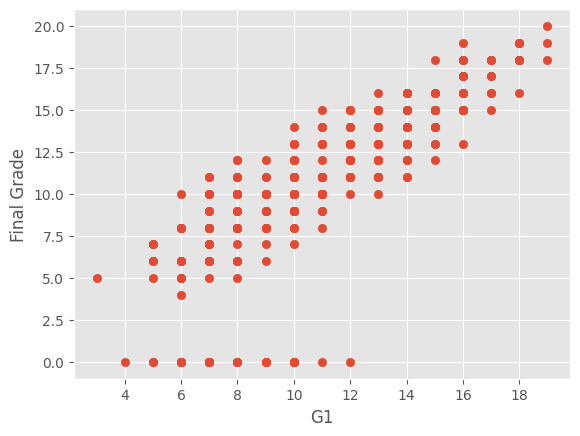

In [8]:
# DRAWING AND PLOTTING MODEL
style.use("ggplot")
plot = "G1"   #can varry to see relation of different features
plt.scatter(data[plot], data["G3"])
# plt.legend(loc = 4)
plt.xlabel(plot)
plt.ylabel("Final Grade")